# Results

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define a custom color palette with a single black color
black_palette = sns.color_palette(['black'])

# Set the color palette to the custom palette
sns.set_palette(black_palette)

# Set the Style to Darkgrid
sns.set_style("darkgrid")

## Load Data

In [4]:
# Read in CSV File
df_final = pd.read_csv('data.csv')

# Shuffle Rows of Data Using the Same Random Seed Used in the Modeling Notebook
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
# Import Results Data
Black_Scholes = pd.read_csv('test_results/bs_results.csv')
layer3_FFNN = pd.read_csv('test_results/3_Layer_FFNN.csv')
layer4_FFNN = pd.read_csv('test_results/4_Layer_FFNN.csv')
layer5_FFNN = pd.read_csv('test_results/5_Layer_FFNN.csv')
XGBoost_5 = pd.read_csv('test_results/XGBoost_5.csv')
XGBoost_10 = pd.read_csv('test_results/XGBoost_10.csv')

# Process Results Data

In [6]:
# Recreate Splits
df_final_train = df_final[:int(0.98 * len(df_final))]
df_final_val = df_final[int(0.98 * len(df_final)):int(0.99 * len(df_final))]
df_final_test = df_final[int(0.99 * len(df_final)):]

In [7]:
# Rename `strike_price` to `Strike Price`
df_final_test.rename(columns={'strike_price': 'Strike Price'}, inplace=True)
# Rename 'under_lag0' to 'underlying_price'
df_final_test.rename(columns={'under_price': 'Underlying Price'}, inplace=True)
# Rename 'zero_coupon' to 'Zero Coupon Rate'
df_final_test.rename(columns={'zero_coupon': 'Zero Coupon Rate'}, inplace=True)
# Rename 'div_yield' to 'Dividend Yield'
df_final_test.rename(columns={'div_yield': 'Dividend Yield'}, inplace=True)
# Rename 'midpoint' to 'Bid and Ask Midpoint Price'
df_final_test.rename(columns={'midpoint': 'Bid-Ask Midpoint Price'}, inplace=True)
# Rename 'opt_type' to Option Type'
df_final_test.rename(columns={'opt_type': 'Option Type'}, inplace=True)
# Rename 'time' to 'Time to Maturity (years)'
df_final_test.rename(columns={'time': 'Time to Maturity (years)'}, inplace=True)

In [8]:
# Filter all the columns that start with 'under_lag'
price_columns = [col for col in df_final_test.columns if col.startswith('under_lag')]
price_test = df_final_test[price_columns]
# Make a Column with Each Rows Standard Deviation
df_final_test['Historical Volatility'] = price_test.std(axis=1)

In [9]:
# Remove all the columns that start with 'under_lag'
# and create a new dataframe called df_final_test_clean
df_filt = df_final_test[df_final_test.columns.drop(list(df_final_test.filter(regex='under_lag')))]

In [10]:
# Revert 'Option Type' to 'Call' or 'Put'
df_filt['Option Type'] = df_filt['Option Type'].apply(lambda x: 'Call' if x == 1 else 'Put')
# Sort df_filt by 'Option Price' in descending order
df_filt = df_filt.sort_values(by='Bid-Ask Midpoint Price', ascending=False)

In [11]:
# Reset Index of df_filt
df_filt = df_filt.reset_index(drop=True)

In [12]:
# Append the 'Absolute Error' columns from the results dataframes to df_filt
df_filt['Black-Scholes Absolute Error'] = Black_Scholes['Absolute Error']
df_filt['3 Layer FFNN Absolute Error'] = layer3_FFNN['Absolute Error']
df_filt['4 Layer FFNN Absolute Error'] = layer4_FFNN['Absolute Error']
df_filt['5 Layer FFNN Absolute Error'] = layer5_FFNN['Absolute Error']
df_filt['XGBoost 5 Absolute Error'] = XGBoost_5['Absolute Error']
df_filt['XGBoost 10 Absolute Error'] = XGBoost_10['Absolute Error']

# Append the 'Absolute Percentage Error' columns from the results dataframes to df_filt
df_filt['Black-Scholes Absolute Percentage Error'] = Black_Scholes['Absolute Percentage Error']
df_filt['3 Layer FFNN Absolute Percentage Error'] = layer3_FFNN['Absolute Percentage Error']
df_filt['4 Layer FFNN Absolute Percentage Error'] = layer4_FFNN['Absolute Percentage Error']
df_filt['5 Layer FFNN Absolute Percentage Error'] = layer5_FFNN['Absolute Percentage Error']
df_filt['XGBoost 5 Absolute Percentage Error'] = XGBoost_5['Absolute Percentage Error']
df_filt['XGBoost 10 Absolute Percentage Error'] = XGBoost_10['Absolute Percentage Error']

In [13]:
df_filt.head()

Strike Price  Underlying Price  Zero Coupon Rate  Dividend Yield  \
0        4100.0            9850.0            0.3823          0.9340   
1        7000.0           12590.0            0.4575          0.8350   
2        7600.0           13100.0            0.5566          0.9000   
3        6200.0           11680.0            0.4443          0.9116   
4        7200.0           12590.0            0.4575          0.8350   

   Bid-Ask Midpoint Price Option Type  Time to Maturity (years)  \
0                  5750.0        Call                   0.01643   
1                  5596.0        Call                   0.10406   
2                  5508.0        Call                   0.07666   
3                  5490.0        Call                   0.06573   
4                  5396.0        Call                   0.10406   

   Historical Volatility  Black-Scholes Absolute Error  \
0             207.560162                     19.351228   
1             249.240425                      6.624403   
2             169.053838                      9.069724   
3             360.789471                     20.942509   
4             249.240425                      9.659863   

   3 Layer FFNN Absolute Error  4 Layer FFNN Absolute Error  \
0                    11.535645                     8.934082   
1                     9.122559                     8.311035   
2                     1.727051                     4.162109   
3                     3.093262                     5.328613   
4                    22.087402                    10.090332   

   5 Layer FFNN Absolute Error  XGBoost 5 Absolute Error  \
0                    38.846190                 63.518066   
1                    10.006836                 14.788574   
2                     7.001465                243.977540   
3                     7.218750                 54.759277   
4                    11.049805                120.155760   

   XGBoost 10 Absolute Error  Black-Scholes Absolute Percentage Error  \
0                 100.601074                                 0.330590   
1                  26.200195                                 0.113931   
2                 233.474120                                 0.156181   
3                 144.881350                                 0.367445   
4                 116.863280                                 0.174727   

   3 Layer FFNN Absolute Percentage Error  \
0                                0.194991   
1                                0.154306   
2                                0.030384   
3                                0.056159   
4                                0.405125   

   4 Layer FFNN Absolute Percentage Error  \
0                                0.151016   
1                                0.140579   
2                                0.073225   
3                                0.096743   
4                                0.185076   

   5 Layer FFNN Absolute Percentage Error  \
0                                0.656629   
1                                0.169263   
2                                0.123178   
3                                0.131059   
4                                0.202674   

   XGBoost 5 Absolute Percentage Error  XGBoost 10 Absolute Percentage Error  
0                             1.073666                              1.700491  
1                             0.250145                              0.443170  
2                             4.292357                              4.107567  
3                             0.994177                              2.630380  
4                             2.203884                              2.143494

# Create Plotting Functions

In [14]:
# Function to Plot a Value's Absolute Error for Every Model
def plot_absolute_error(df, x_value, x_log=True, y_log=True):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
    sns.scatterplot(x=x_value, y='Black-Scholes Absolute Error', data=df, ax=axes[0, 0])
    sns.scatterplot(x=x_value, y='XGBoost 5 Absolute Error', data=df, ax=axes[0, 1])
    sns.scatterplot(x=x_value, y='XGBoost 10 Absolute Error', data=df, ax=axes[0, 2])
    sns.scatterplot(x=x_value, y='3 Layer FFNN Absolute Error', data=df, ax=axes[1, 0])
    sns.scatterplot(x=x_value, y='4 Layer FFNN Absolute Error', data=df, ax=axes[1, 1])
    sns.scatterplot(x=x_value, y='5 Layer FFNN Absolute Error', data=df, ax=axes[1, 2])

    if x_log == True:
        # Make x axis log scale
        axes[0, 0].set_xscale('log')
        axes[0, 1].set_xscale('log')
        axes[1, 0].set_xscale('log')
        axes[1, 1].set_xscale('log')
        axes[0, 2].set_xscale('log')
        axes[1, 2].set_xscale('log')

    if y_log == True:
        # Make y axis log scale
        axes[0, 0].set_yscale('log')
        axes[0, 1].set_yscale('log')
        axes[1, 0].set_yscale('log')
        axes[1, 1].set_yscale('log')
        axes[0, 2].set_yscale('log')
        axes[1, 2].set_yscale('log')

    # Add Individual Titles
    axes[0, 0].set_title('Black-Scholes', fontsize=14)
    axes[0, 1].set_title('XGBoost 5', fontsize=14)
    axes[0, 2].set_title('XGBoost 10', fontsize=14)
    axes[1, 0].set_title('3 Layer FFNN', fontsize=14)
    axes[1, 1].set_title('4 Layer FFNN', fontsize=14)
    axes[1, 2].set_title('5 Layer FFNN', fontsize=14)

    # Add Common X and Y Labels
    fig.text(0.5, 0.04, x_value, ha='center', va='center', fontsize=14)
    fig.text(0.04, 0.5, 'Absolute Error', ha='center', va='center', rotation='vertical', fontsize=14)

    # Remove Individual x and y Labels
    axes[0, 0].set_xlabel('')
    axes[0, 1].set_xlabel('')
    axes[1, 0].set_xlabel('')
    axes[1, 1].set_xlabel('')
    axes[0, 2].set_xlabel('')
    axes[1, 2].set_xlabel('')
    axes[0, 0].set_ylabel('')
    axes[0, 1].set_ylabel('')
    axes[1, 0].set_ylabel('')
    axes[1, 1].set_ylabel('')
    axes[0, 2].set_ylabel('')
    axes[1, 2].set_ylabel('')

    # Get the Maximum and Minimum values for all of the x-axis values
    x_max = df_filt[x_value].max()
    x_min = df_filt[x_value].min()

    # Get the Maximum and Minimum values from all of the absolute error columns
    y_max = df_filt[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error', 'XGBoost 10 Absolute Error',
                        '3 Layer FFNN Absolute Error', '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']].max().max()
    y_min = df_filt[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error', 'XGBoost 10 Absolute Error',
                        '3 Layer FFNN Absolute Error', '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']].min().min()
    
    # Set Common x and y Limits for all plots
    axes[0, 0].set_xlim(x_min, x_max)
    axes[0, 1].set_xlim(x_min, x_max)
    axes[1, 0].set_xlim(x_min, x_max)
    axes[1, 1].set_xlim(x_min, x_max)
    axes[0, 2].set_xlim(x_min, x_max)
    axes[1, 2].set_xlim(x_min, x_max)
    axes[0, 0].set_ylim(y_min, y_max)
    axes[0, 1].set_ylim(y_min, y_max)
    axes[1, 0].set_ylim(y_min, y_max)
    axes[1, 1].set_ylim(y_min, y_max)
    axes[0, 2].set_ylim(y_min, y_max)
    axes[1, 2].set_ylim(y_min, y_max)

    # Add More Space Between Models and all the plots
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Title the entire figure
    fig.suptitle('Absolute Error Histograms', fontsize=16)

In [15]:
# Function to Plot a Value's Absolute Percentage Error for Every Model
def plot_absolute_percentage_error(df, x_value, x_log=True, y_log=True):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
    sns.scatterplot(x=x_value, y='Black-Scholes Absolute Percentage Error', data=df, ax=axes[0, 0])
    sns.scatterplot(x=x_value, y='XGBoost 5 Absolute Percentage Error', data=df, ax=axes[0, 1])
    sns.scatterplot(x=x_value, y='XGBoost 10 Absolute Percentage Error', data=df, ax=axes[0, 2])
    sns.scatterplot(x=x_value, y='3 Layer FFNN Absolute Percentage Error', data=df, ax=axes[1, 0])
    sns.scatterplot(x=x_value, y='4 Layer FFNN Absolute Percentage Error', data=df, ax=axes[1, 1])
    sns.scatterplot(x=x_value, y='5 Layer FFNN Absolute Percentage Error', data=df, ax=axes[1, 2])

    if x_log == True:
        # Make x axis log scale
        axes[0, 0].set_xscale('log')
        axes[0, 1].set_xscale('log')
        axes[0, 2].set_xscale('log')
        axes[1, 0].set_xscale('log')
        axes[1, 1].set_xscale('log')
        axes[1, 2].set_xscale('log')

    if y_log == True:
        # Make y axis log scale
        axes[0, 0].set_yscale('log')
        axes[0, 1].set_yscale('log')
        axes[0, 2].set_yscale('log')
        axes[1, 0].set_yscale('log')
        axes[1, 1].set_yscale('log')
        axes[1, 2].set_yscale('log')

    # Add Individual Titles
    axes[0, 0].set_title('Black-Scholes', fontsize=14)
    axes[0, 1].set_title('XGBoost 5', fontsize=14)
    axes[0, 2].set_title('XGBoost 10', fontsize=14)
    axes[1, 0].set_title('3 Layer FFNN', fontsize=14)
    axes[1, 1].set_title('4 Layer FFNN', fontsize=14)
    axes[1, 2].set_title('5 Layer FFNN', fontsize=14)

    # Add Common X and Y Labels
    fig.text(0.5, 0.04, x_value, ha='center', va='center', fontsize=14)
    fig.text(0.04, 0.5, 'Absolute Percentage Error', ha='center', va='center', rotation='vertical', fontsize=14)

    # Remove Individual x and y Labels
    axes[0, 0].set_xlabel('')
    axes[0, 1].set_xlabel('')
    axes[1, 0].set_xlabel('')
    axes[1, 1].set_xlabel('')
    axes[0, 2].set_xlabel('')
    axes[1, 2].set_xlabel('')
    axes[0, 0].set_ylabel('')
    axes[0, 1].set_ylabel('')
    axes[1, 0].set_ylabel('')
    axes[1, 1].set_ylabel('')
    axes[0, 2].set_ylabel('')
    axes[1, 2].set_ylabel('')

    # Get the Maximum and Minimum values for all of the x-axis values
    x_max = df_filt[x_value].max()
    x_min = df_filt[x_value].min()

    # Get the Maximum and Minimum values from all of the absolute percentage error columns
    y_max = df_filt[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                        'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                        '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']].max().max()
    y_min = df_filt[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                        'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                        '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']].min().min()
    
    # Set Common x and y Limits for all plots
    axes[0, 0].set_xlim(x_min, x_max)
    axes[0, 1].set_xlim(x_min, x_max)
    axes[1, 0].set_xlim(x_min, x_max)
    axes[1, 1].set_xlim(x_min, x_max)
    axes[0, 2].set_xlim(x_min, x_max)
    axes[1, 2].set_xlim(x_min, x_max)
    axes[0, 0].set_ylim(y_min, y_max)
    axes[0, 1].set_ylim(y_min, y_max)
    axes[1, 0].set_ylim(y_min, y_max)
    axes[1, 1].set_ylim(y_min, y_max)
    axes[0, 2].set_ylim(y_min, y_max)
    axes[1, 2].set_ylim(y_min, y_max)



    # Add More Space Between Models and all the plots
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Title the entire figure
    fig.suptitle('Absolute Percentage Error Histograms', fontsize=16)

# Plot Errors by Variable

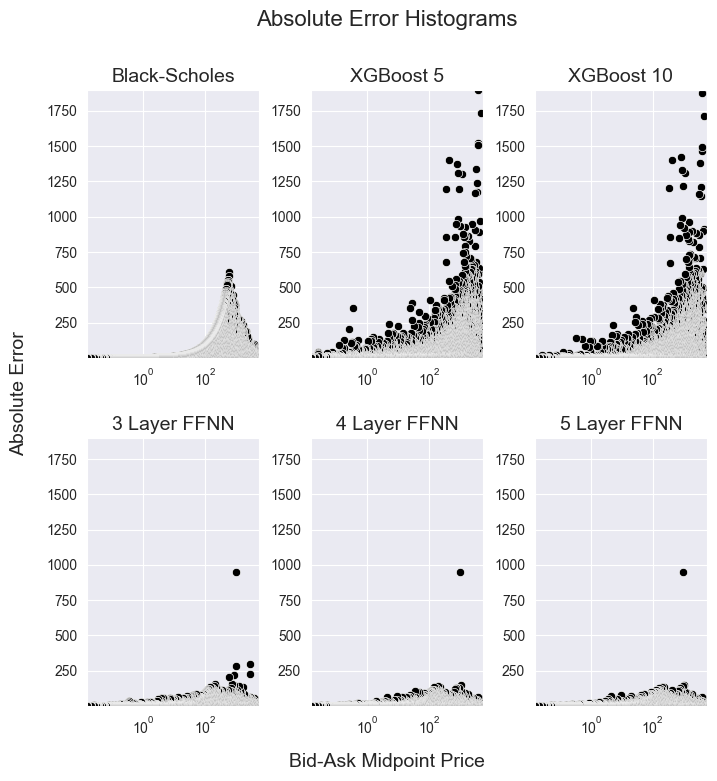

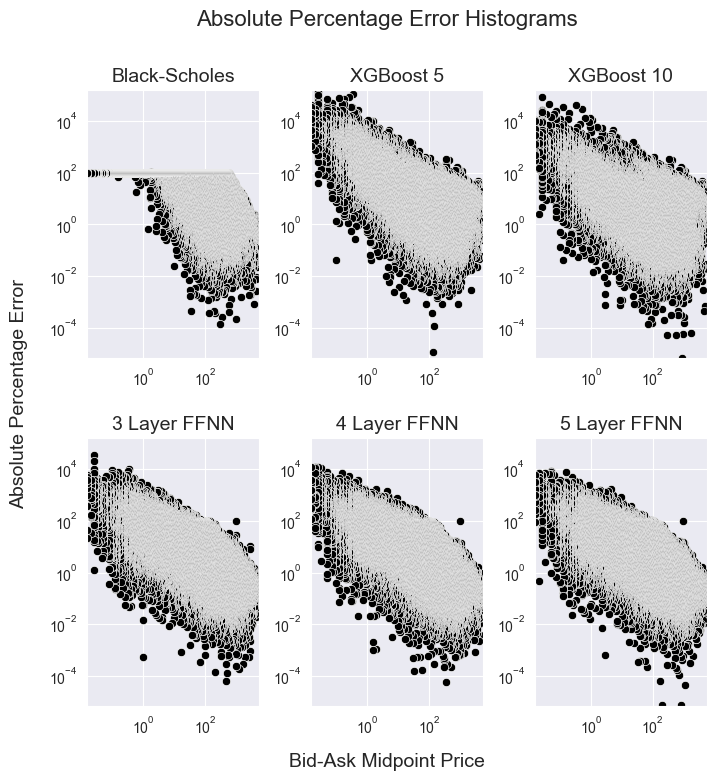

In [16]:
x_value = 'Bid-Ask Midpoint Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

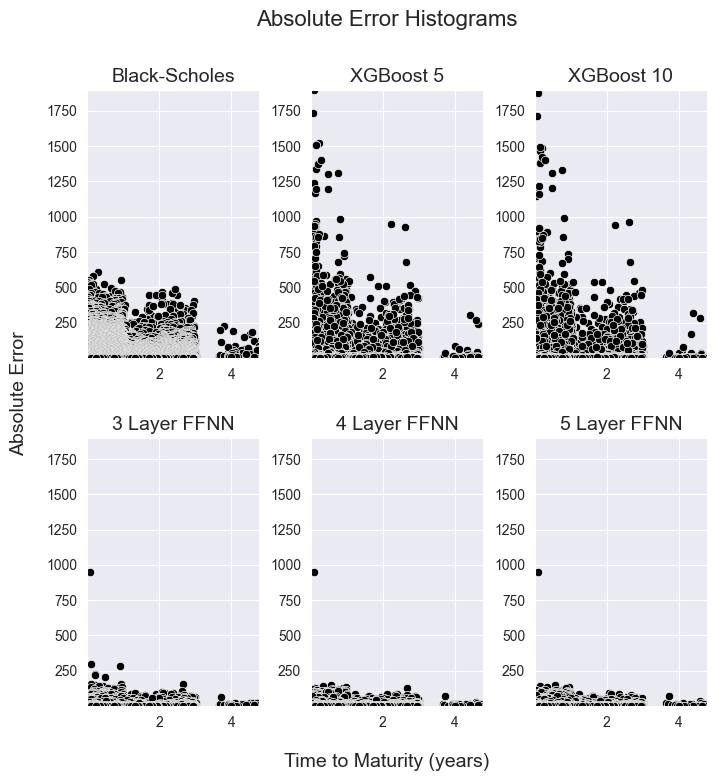

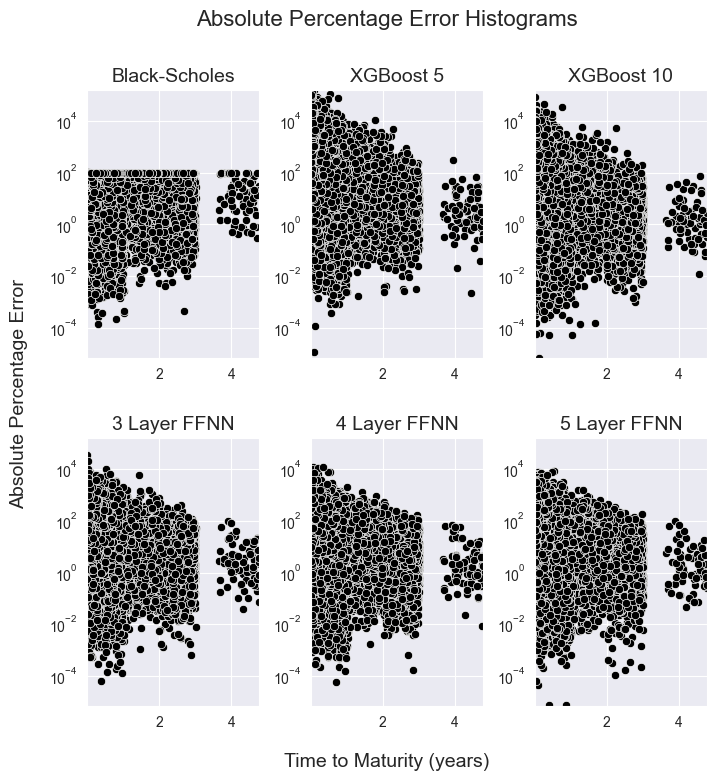

In [17]:
x_value = 'Time to Maturity (years)'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

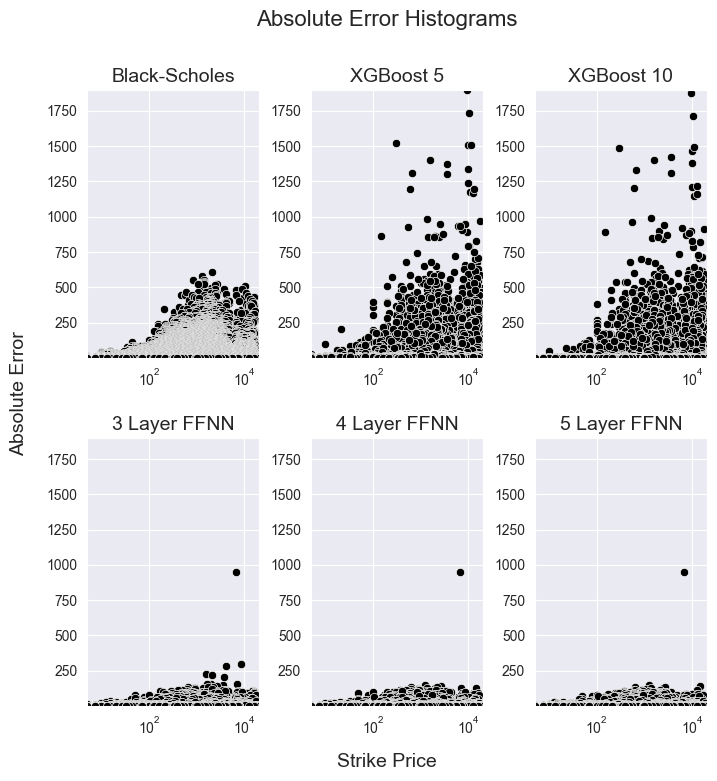

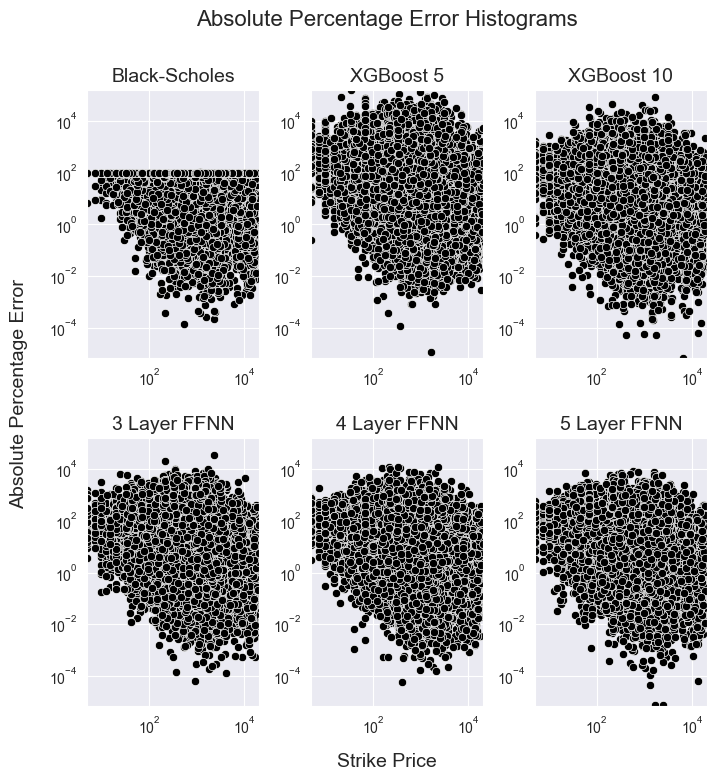

In [18]:
x_value = 'Strike Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

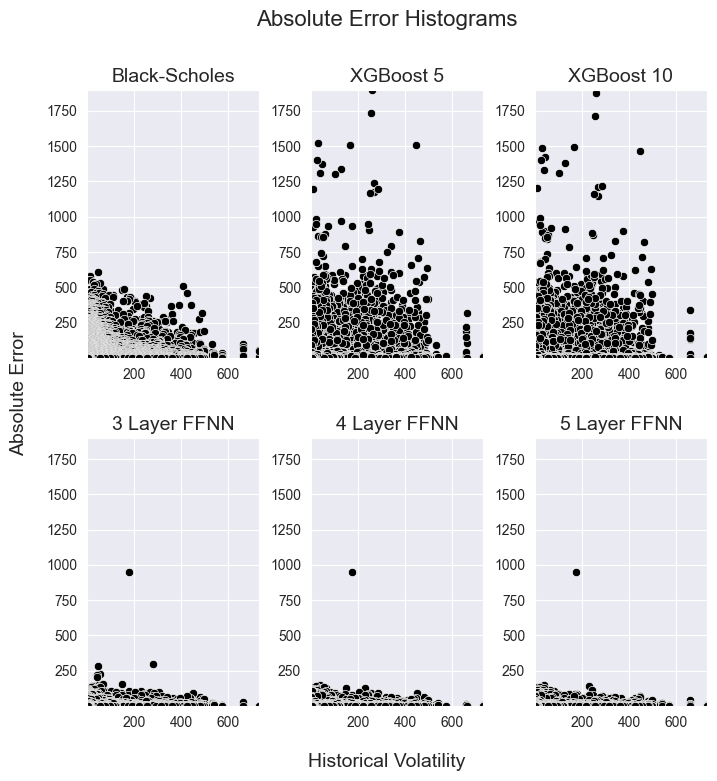

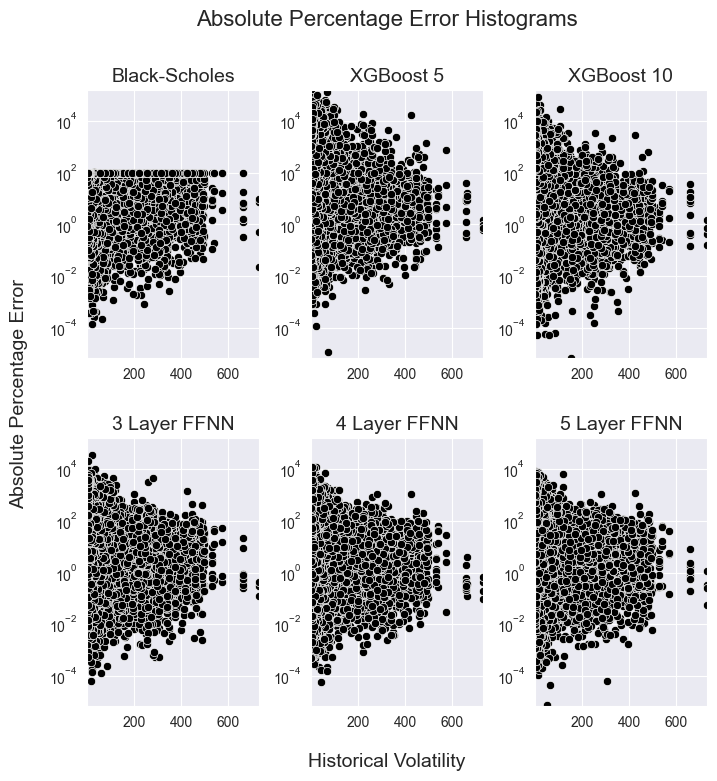

In [19]:
x_value = 'Historical Volatility'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

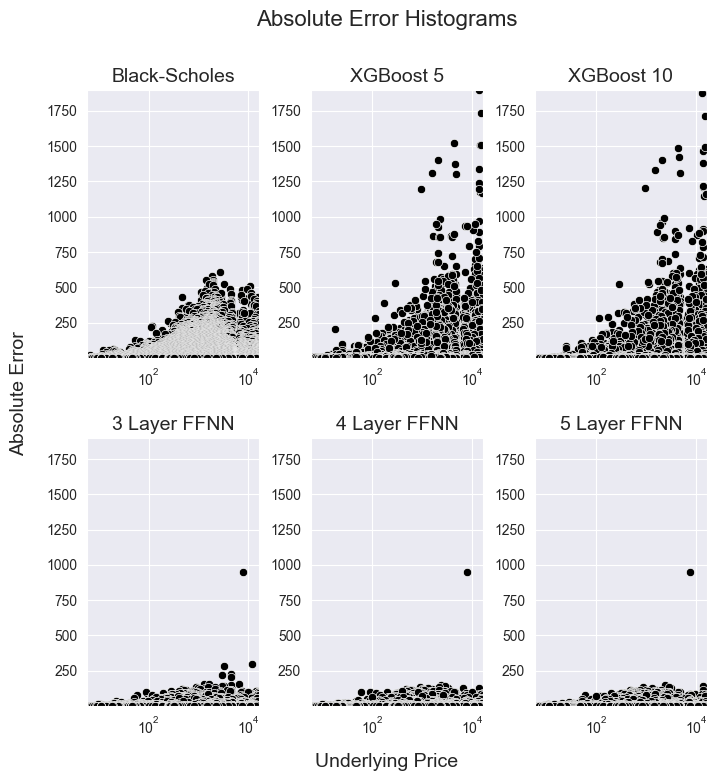

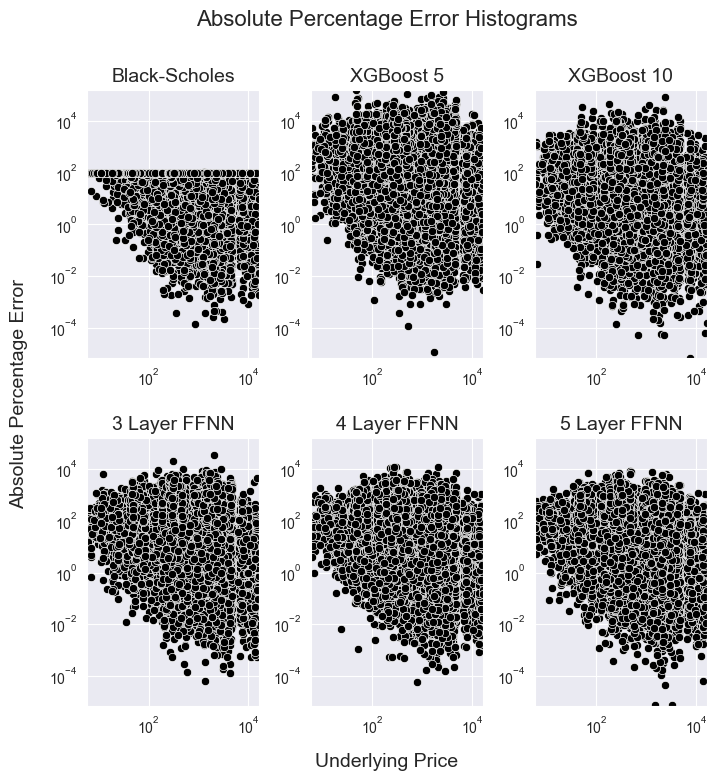

In [20]:
x_value = 'Underlying Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

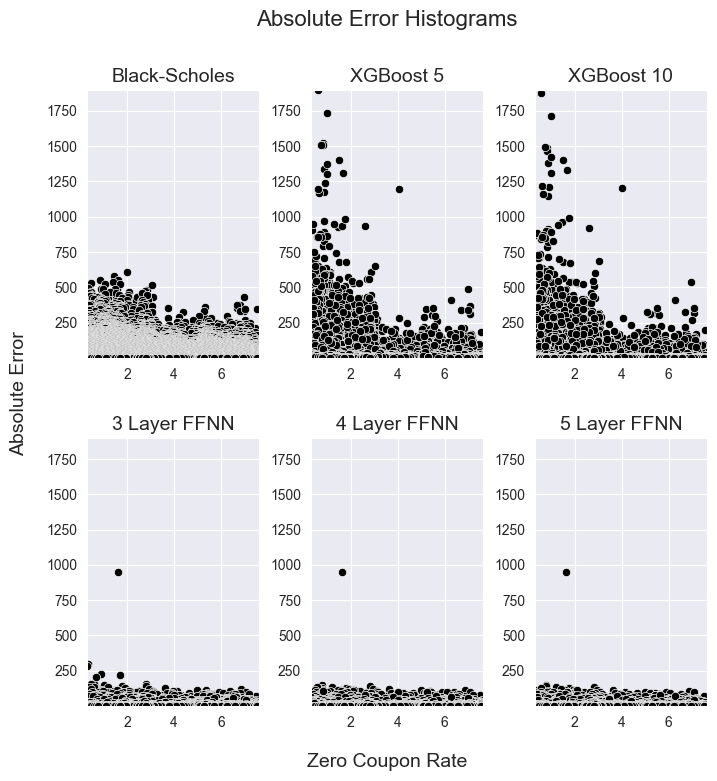

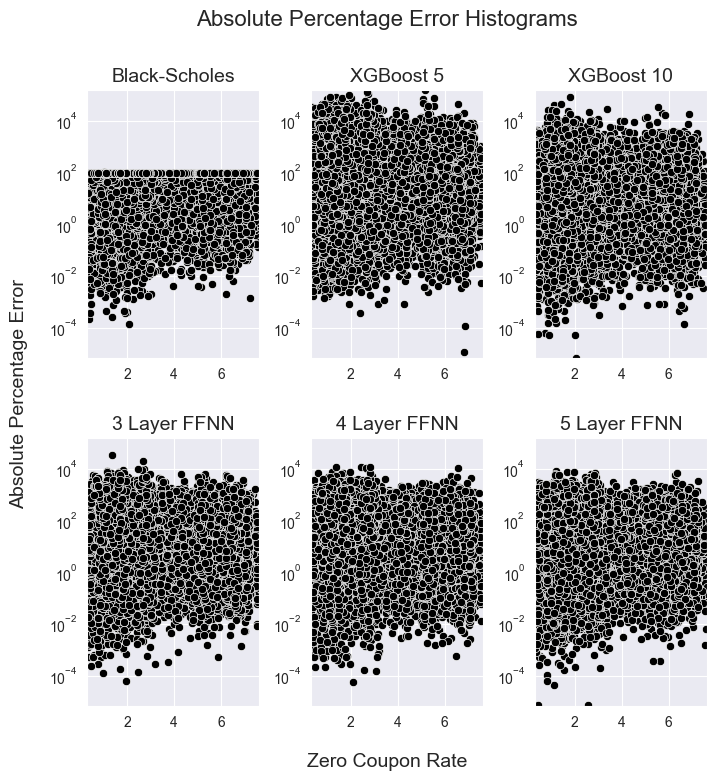

In [21]:
x_value = 'Zero Coupon Rate'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

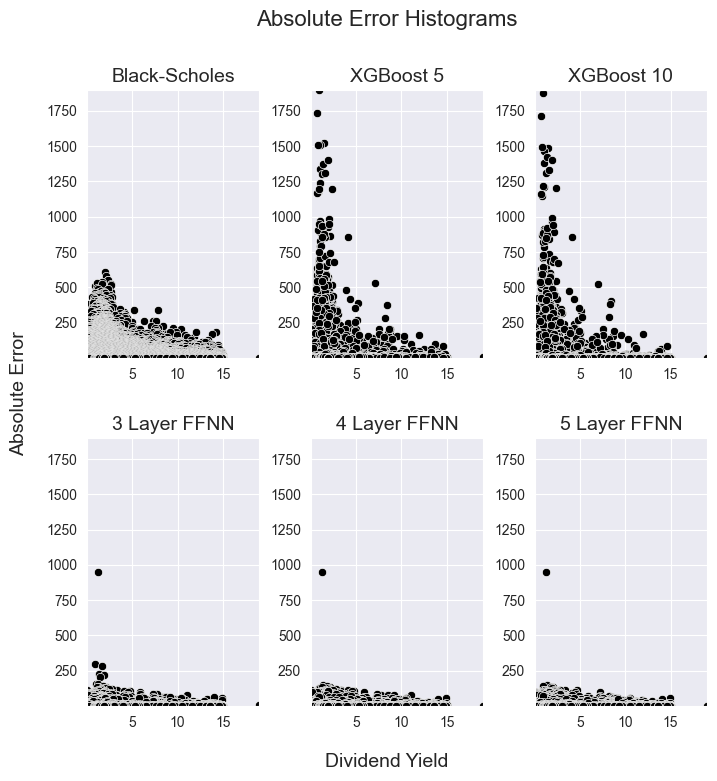

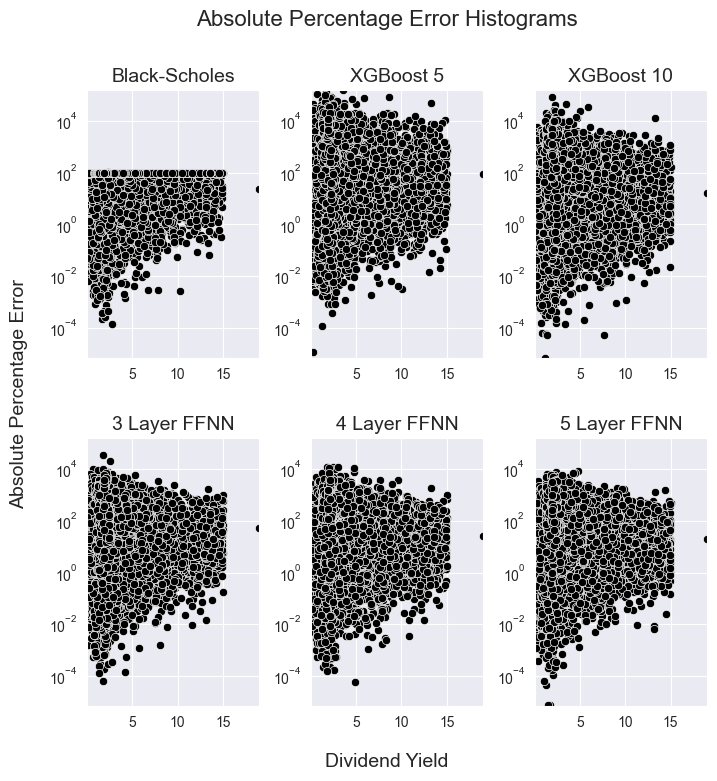

In [22]:
x_value = 'Dividend Yield'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

# Create Tables Summarizing Results

In [23]:
# Create a Table with the Mean Absolute Error from Each Model
mean_absolute_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error',
                                                                   'XGBoost 10 Absolute Error', '3 Layer FFNN Absolute Error',
                                                                   '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']
                                                                   ].round(2)
# Add a Totals Row
mean_absolute_error_table.loc['Total'] = mean_absolute_error_table.mean()

# Rename Columns with the Model Name + MAE
mean_absolute_error_table.columns = ['Black-Scholes MAE', 'XGBoost 5 MAE', 'XGBoost 10 MAE', '3 Layer FFNN MAE', '4 Layer FFNN MAE',
                                     '5 Layer FFNN MAE']

df = mean_absolute_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type         Call    Put   Total
5 Layer FFNN MAE    5.20   4.33   4.765
4 Layer FFNN MAE    5.30   4.46   4.880
3 Layer FFNN MAE    6.20   5.11   5.655
XGBoost 10 MAE     10.13   4.55   7.340
XGBoost 5 MAE      13.33   7.41  10.370
Black-Scholes MAE  28.23  21.17  24.700

In [24]:
# Create a Table with the Mean Absolute Percentage Error from Each Model
mean_absolute_percentage_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                                                                              'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                                                                              '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']
                                                                              ].round(2)

# Add a Totals Row
mean_absolute_percentage_error_table.loc['Total'] = mean_absolute_percentage_error_table.mean()

# Rename Columns with the Model Name + MAPE
mean_absolute_percentage_error_table.columns = ['Black-Scholes MAPE', 'XGBoost 5 MAPE', 'XGBoost 10 MAPE', '3 Layer FFNN MAPE',
                                                '4 Layer FFNN MAPE', '5 Layer FFNN MAPE']

df = mean_absolute_percentage_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type           Call     Put    Total
5 Layer FFNN MAPE    33.06   42.31   37.685
4 Layer FFNN MAPE    35.89   45.67   40.780
3 Layer FFNN MAPE    41.13   54.99   48.060
XGBoost 10 MAPE      47.62   59.06   53.340
Black-Scholes MAPE   57.18   70.22   63.700
XGBoost 5 MAPE      193.39  264.49  228.940

# Analysis of Results for Options with Bid-Ask Midpoint Prices above 100 and below 1000

In [25]:
# Filter Out Values where 'Midpoint' is below 100 and above 1000
df_filt = df_filt[(df_filt['Bid-Ask Midpoint Price'] > 100) & (df_filt['Bid-Ask Midpoint Price'] < 1000)]

# Plot Errors by Variable

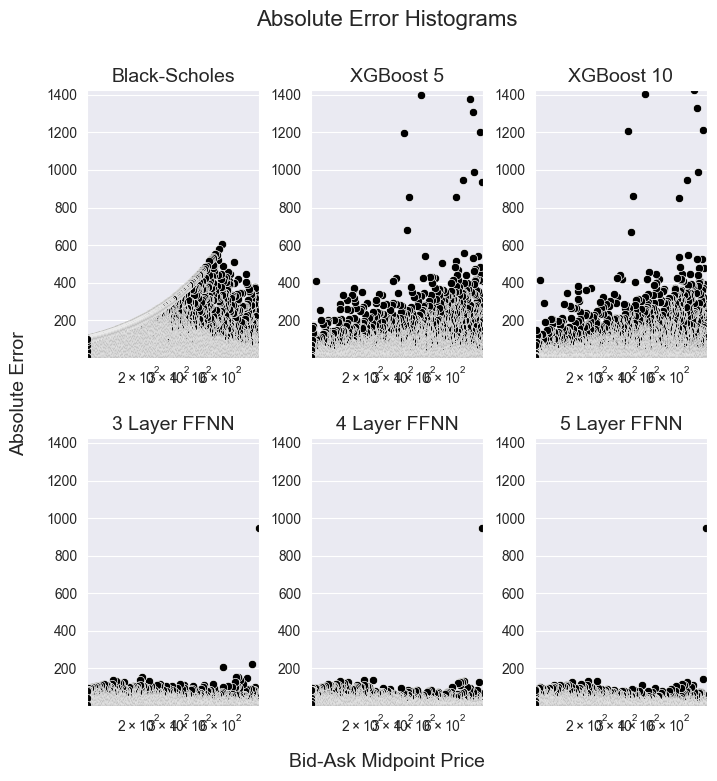

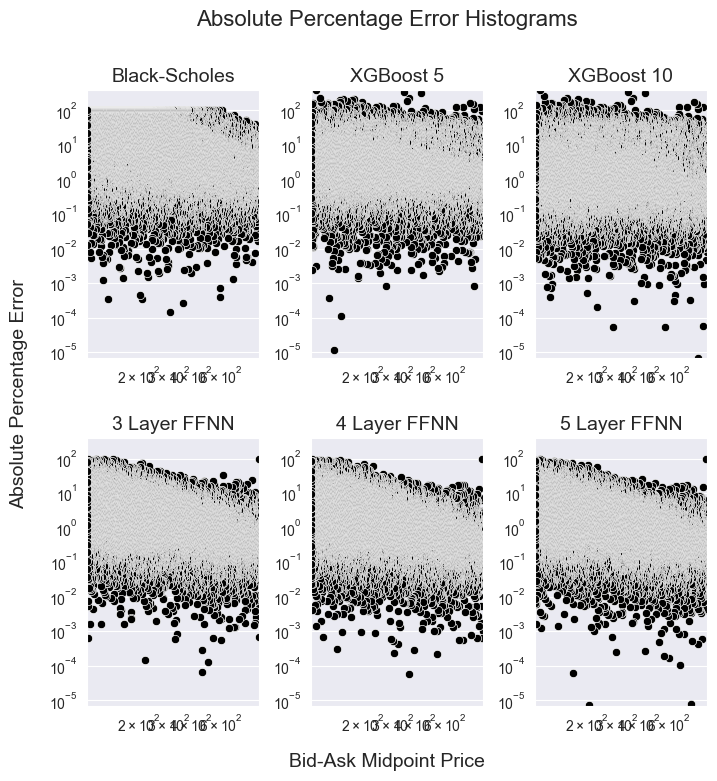

In [26]:
x_value = 'Bid-Ask Midpoint Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

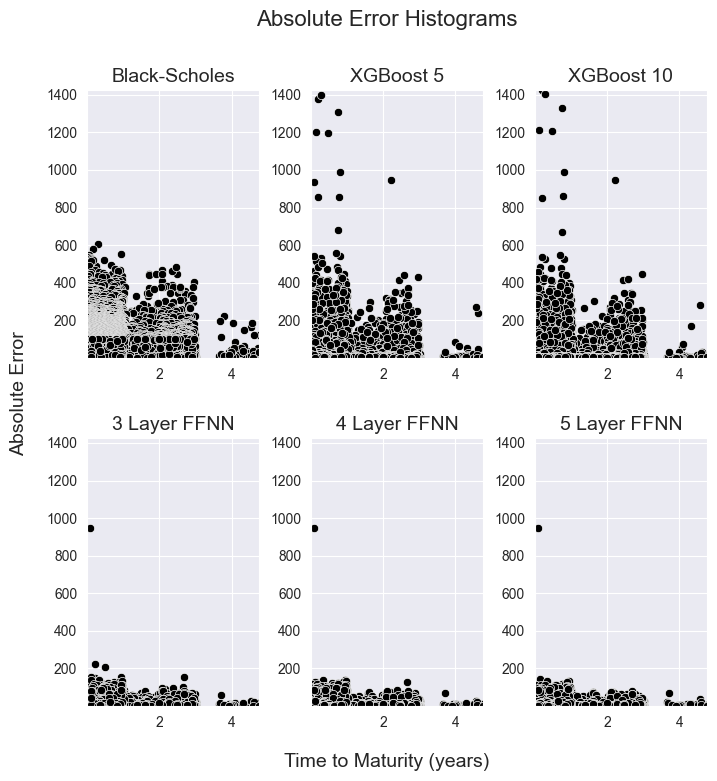

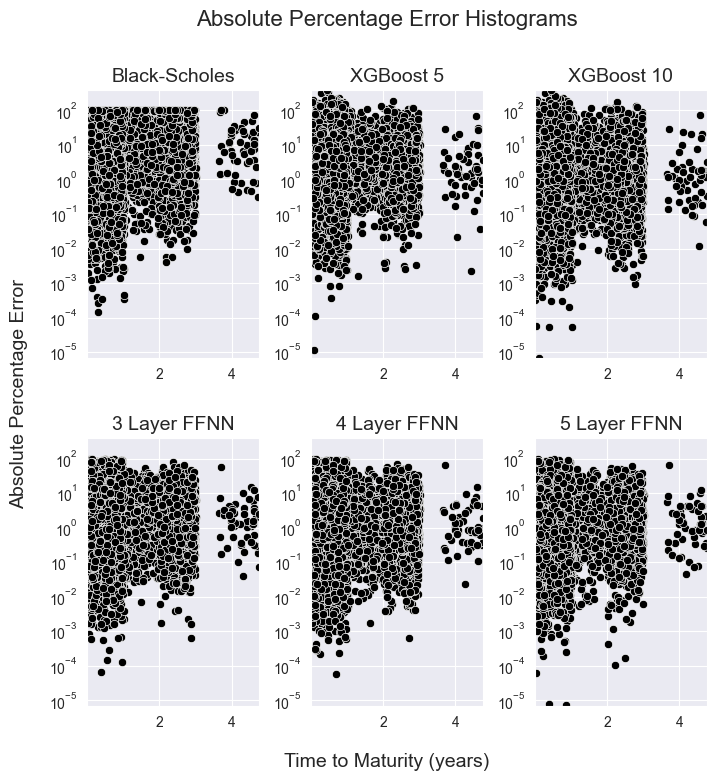

In [27]:
x_value = 'Time to Maturity (years)'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

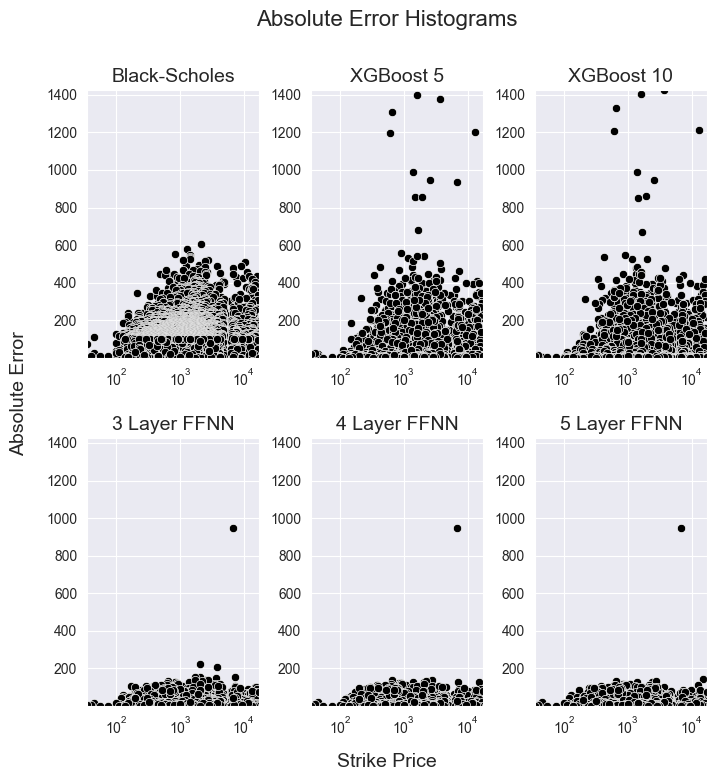

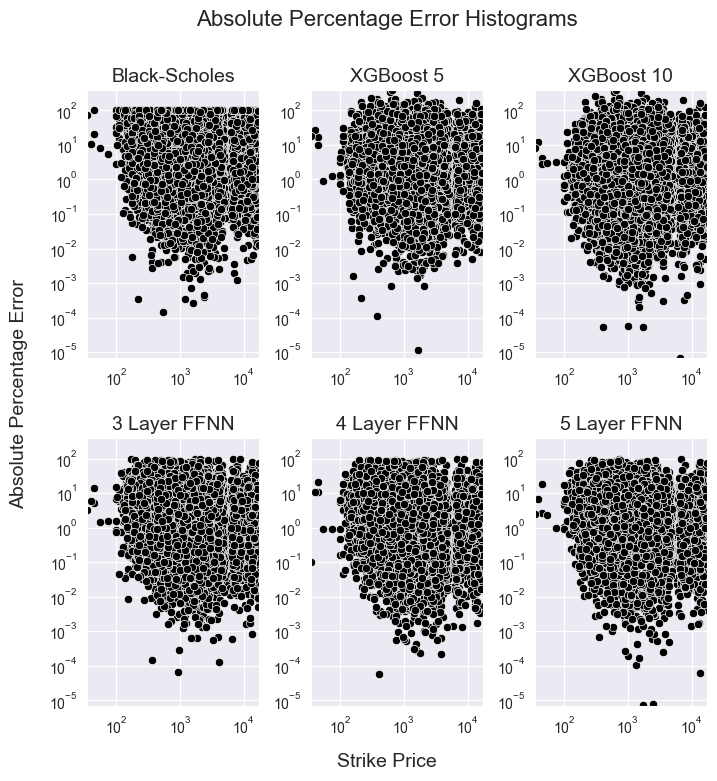

In [28]:
x_value = 'Strike Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

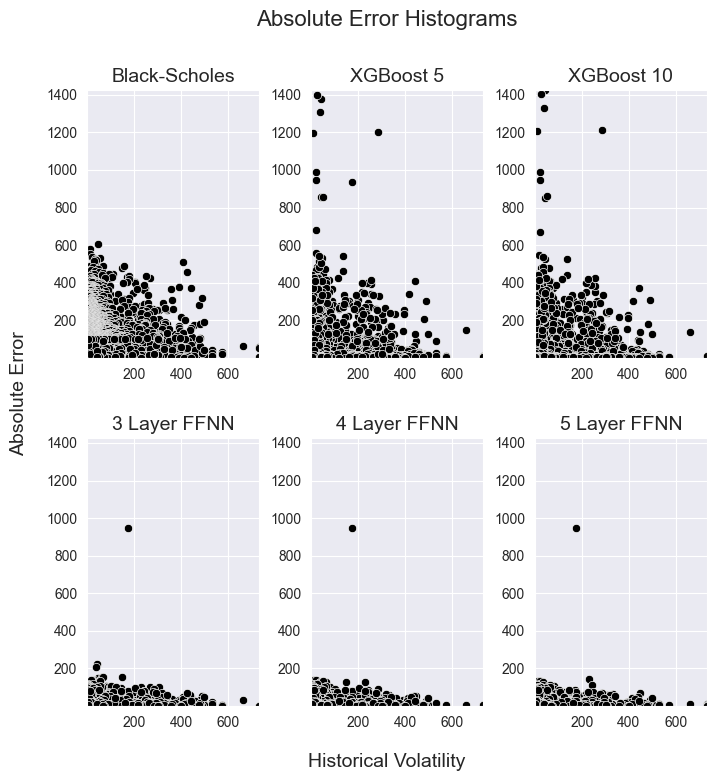

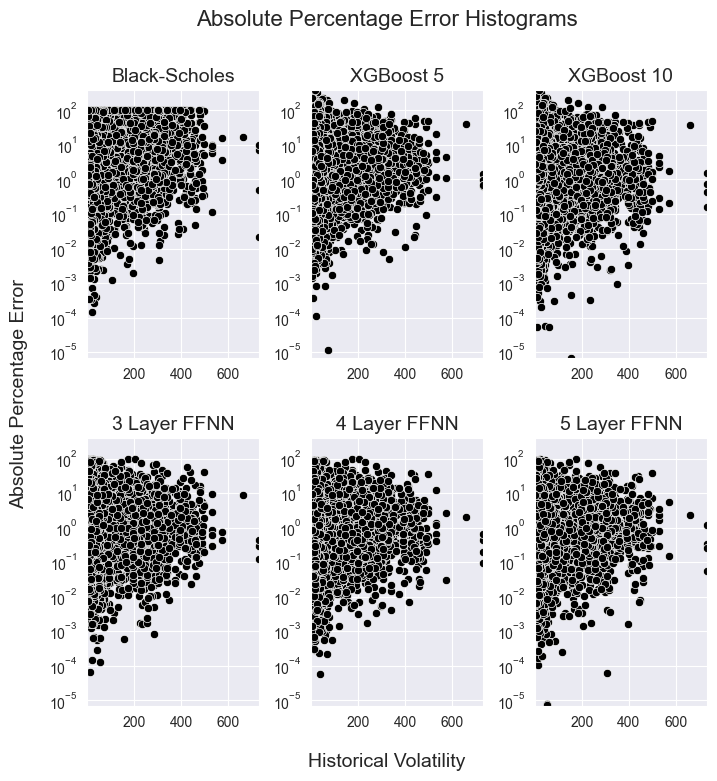

In [29]:
x_value = 'Historical Volatility'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

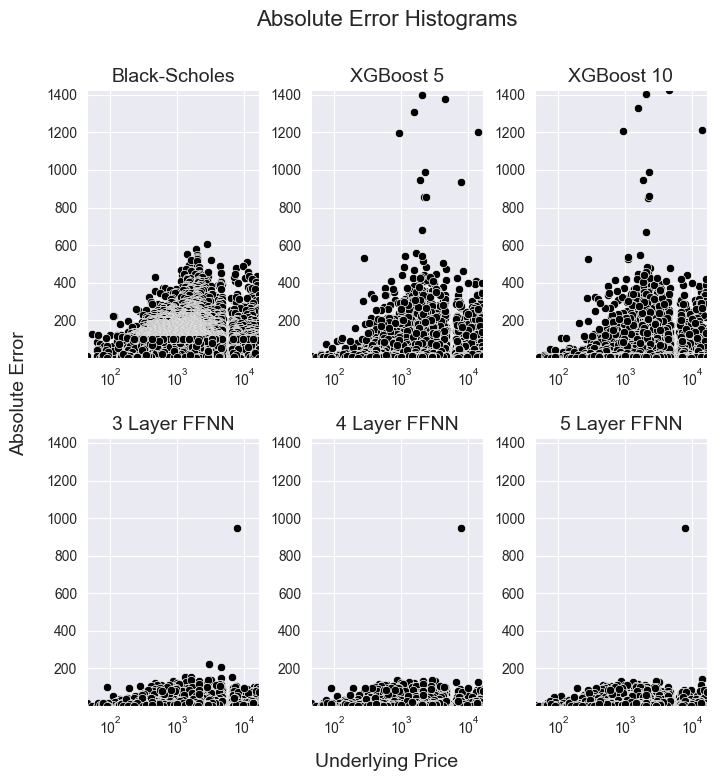

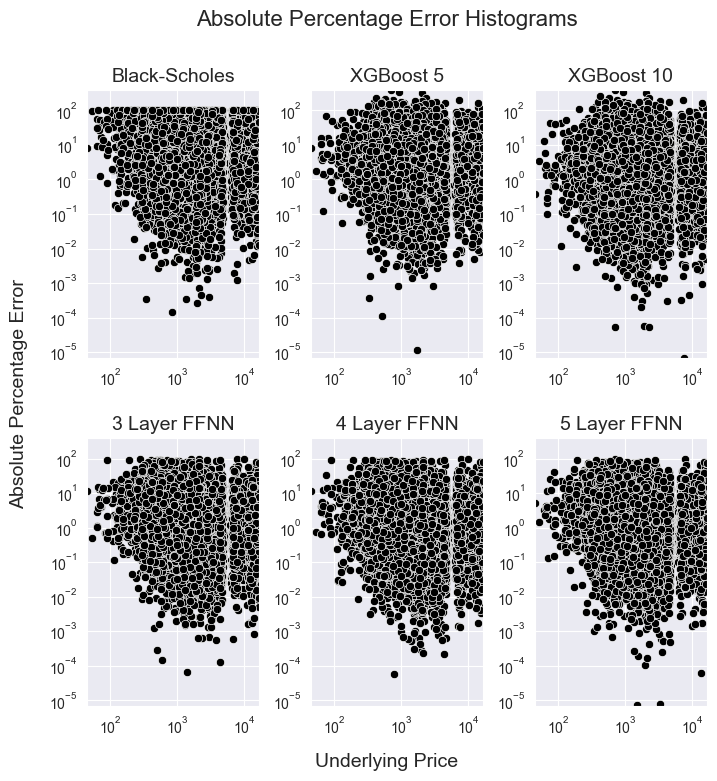

In [30]:
x_value = 'Underlying Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

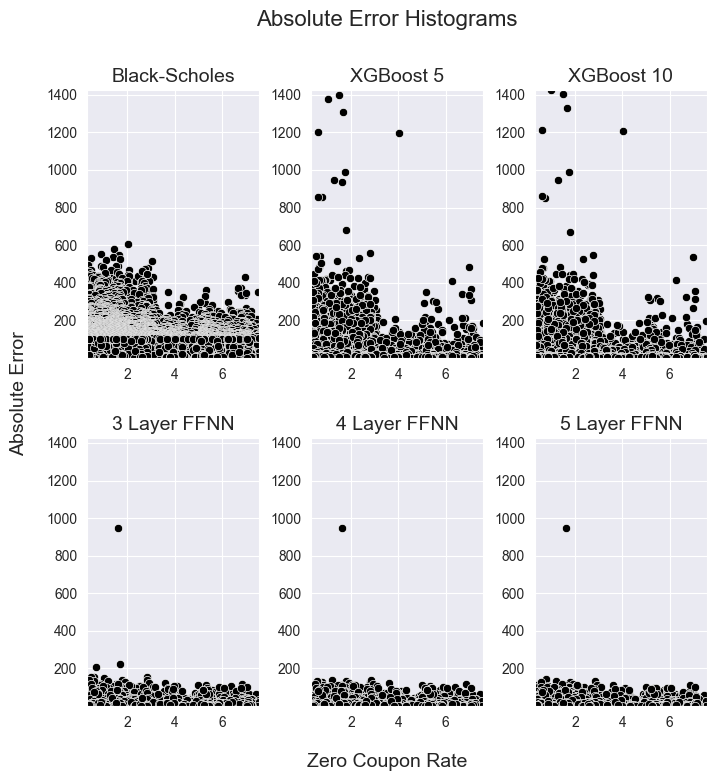

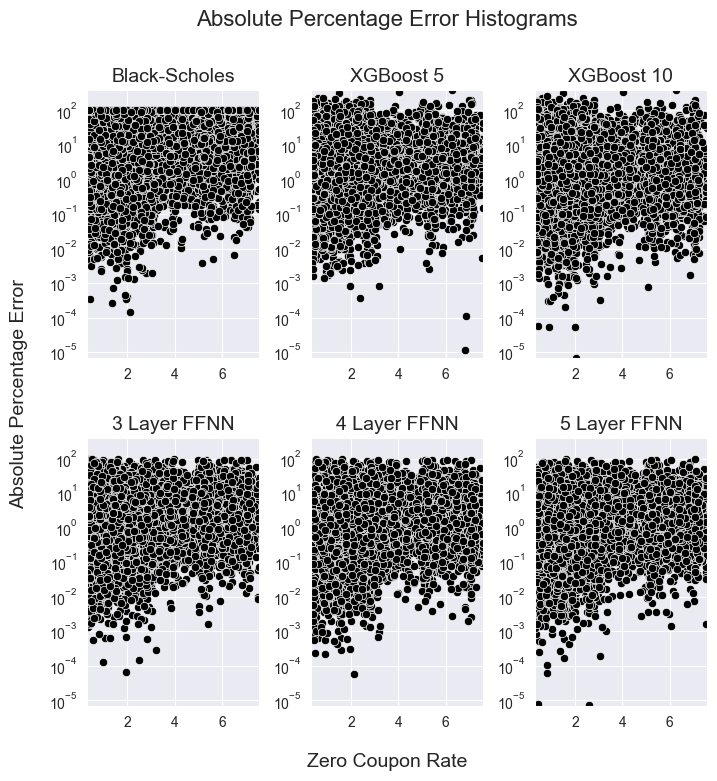

In [31]:
x_value = 'Zero Coupon Rate'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

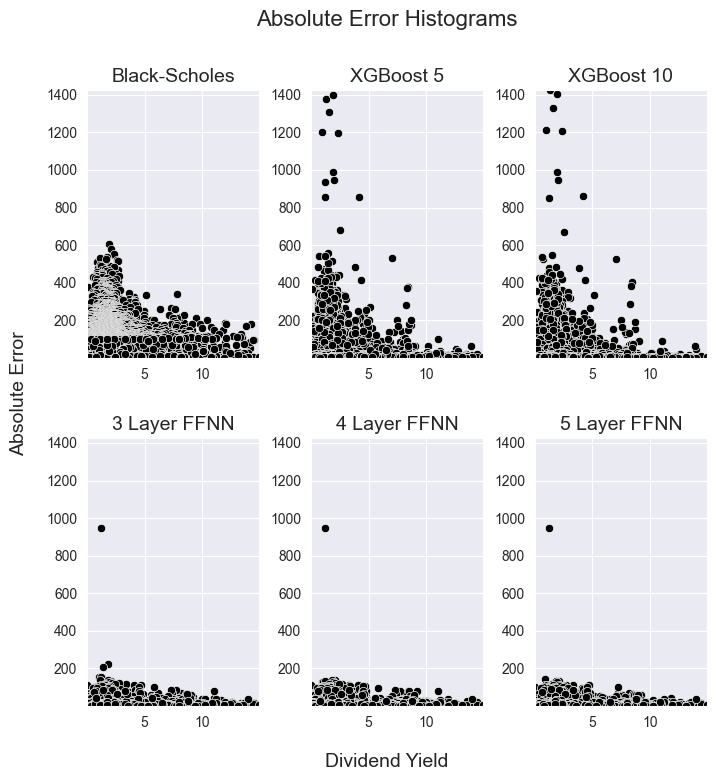

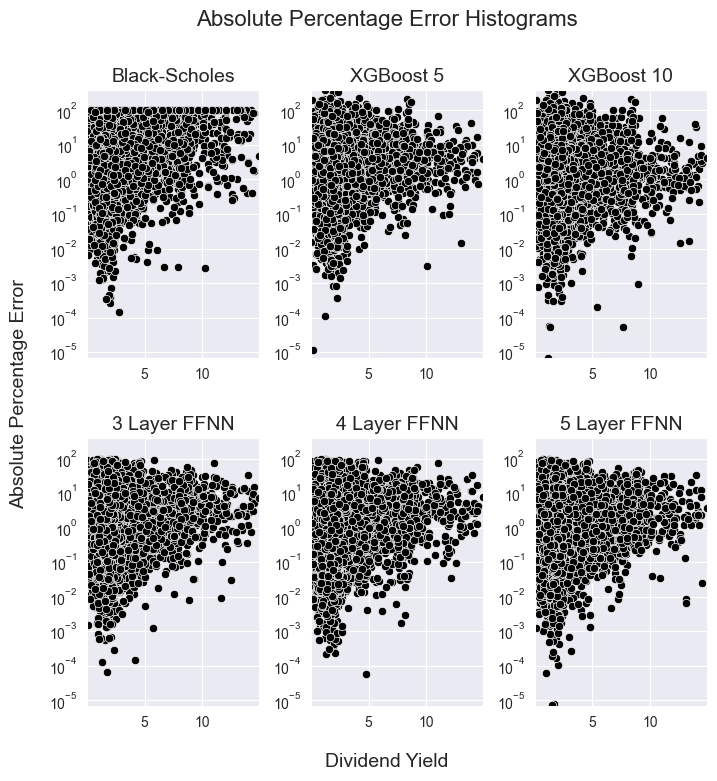

In [32]:
x_value = 'Dividend Yield'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

# Create Tables Summarizing Results

In [33]:
# Create a Table with the Mean Absolute Error from Each Model
mean_absolute_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error',
                                                                   'XGBoost 10 Absolute Error', '3 Layer FFNN Absolute Error',
                                                                   '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']
                                                                   ].round(2)
# Add a Totals Row
mean_absolute_error_table.loc['Total'] = mean_absolute_error_table.mean()

# Rename Columns with the Model Name + MAE
mean_absolute_error_table.columns = ['Black-Scholes MAE', 'XGBoost 5 MAE', 'XGBoost 10 MAE', '3 Layer FFNN MAE', '4 Layer FFNN MAE',
                                     '5 Layer FFNN MAE']

df = mean_absolute_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type         Call    Put   Total
5 Layer FFNN MAE    7.21   7.56   7.385
4 Layer FFNN MAE    7.36   7.77   7.565
3 Layer FFNN MAE    8.86   9.26   9.060
XGBoost 10 MAE     16.40  12.63  14.515
XGBoost 5 MAE      20.01  15.95  17.980
Black-Scholes MAE  50.00  52.15  51.075

In [34]:
# Create a Table with the Mean Absolute Percentage Error from Each Model
mean_absolute_percentage_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                                                                              'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                                                                              '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']
                                                                              ].round(2)

# Add a Totals Row
mean_absolute_percentage_error_table.loc['Total'] = mean_absolute_percentage_error_table.mean()

# Rename Columns with the Model Name + MAPE
mean_absolute_percentage_error_table.columns = ['Black-Scholes MAPE', 'XGBoost 5 MAPE', 'XGBoost 10 MAPE', '3 Layer FFNN MAPE',
                                                '4 Layer FFNN MAPE', '5 Layer FFNN MAPE']

df = mean_absolute_percentage_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type          Call    Put   Total
5 Layer FFNN MAPE    3.44   4.18   3.810
4 Layer FFNN MAPE    3.54   4.30   3.920
3 Layer FFNN MAPE    4.16   5.04   4.600
XGBoost 10 MAPE      5.07   4.99   5.030
XGBoost 5 MAPE       6.66   6.75   6.705
Black-Scholes MAPE  23.18  27.54  25.360